In [14]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
# hyper-parameters tuning
from sklearn.model_selection import GridSearchCV

test_dataset = pd.read_csv("./testingDataset-cleaned-super.csv")
test_dataset.dropna(subset=["Tweet Text","tag"], inplace=True)


# label coding 
tag_codes = {
    "positive" : 1,     
    "neutral" : -1,
    "negative" : 0
}



# category mapping
test_dataset["tag_code"] = test_dataset["tag"]
test_dataset = test_dataset.replace({"tag_code" :tag_codes})

test_dataset.to_csv('file.csv')
X_test = test_dataset['Tweet Text']
y_test = test_dataset["tag_code"]



In [ ]:

#save your model or results
joblib.dump(grid, 'model_svm.pkl')


In [ ]:
grid = {}
grid['svm'] = joblib.load("model_svm_tfidf.pkl") #Support Vector Machine
grid['lr'] = joblib.load("model_lr_count.pkl")   #Logistic Regression
grid['mnb'] = joblib.load("model_mnb_count.pkl") #Multinomial Naive Bayes
grid['cnb'] = joblib.load("model_cnb_count.pkl") #Complement Naive Bayes
grid['dt'] = joblib.load("model_dt_count.pkl")   #Decision Tree
grid['rf'] = joblib.load("model_rf_count.pkl")   #Random Forest


for key in grid:
  print("************* CLASSIFICATION REPORT OF: ",key," *************")
  y_pred = grid[key].predict(X_test)
  print(classification_report(y_test, y_pred,labels=[1,-1,0]))

In [5]:
#Ripasso veloci diction variable
diz = {} #->Obbligatorio!!!
diz["ale"] = 123
diz["buu"] = 321
diz["grande"] = 333

for key in diz:
  print(key,"->",diz[key])

ale -> 123
buu -> 321
grande -> 333


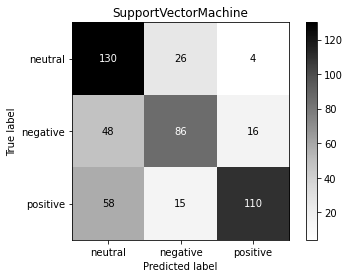

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
class_names=["neutral","negative","positive"]
title = "SupportVectorMachine"

disp = plot_confusion_matrix(grid['svm'],X_test,y_test,display_labels=class_names,cmap=plt.cm.Greys,values_format='')
disp.ax_.set_title(title)
confusion_matrix(y_test,y_pred)

print(disp)

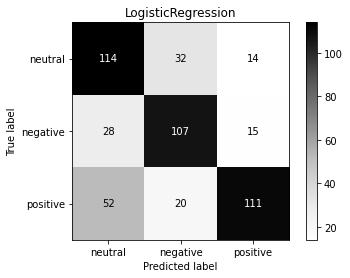

In [28]:

title = "LogisticRegression"

disp = plot_confusion_matrix(grid['lr'],X_test,y_test,display_labels=class_names,cmap=plt.cm.Greys,values_format='')
disp.ax_.set_title(title)
confusion_matrix(y_test,y_pred)

print(disp)